In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("redwine.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


So by taking a look at the above data frame I can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem!

In [5]:
df.tail

<bound method NDFrame.tail of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
 df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Great none of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype.

<AxesSubplot:>

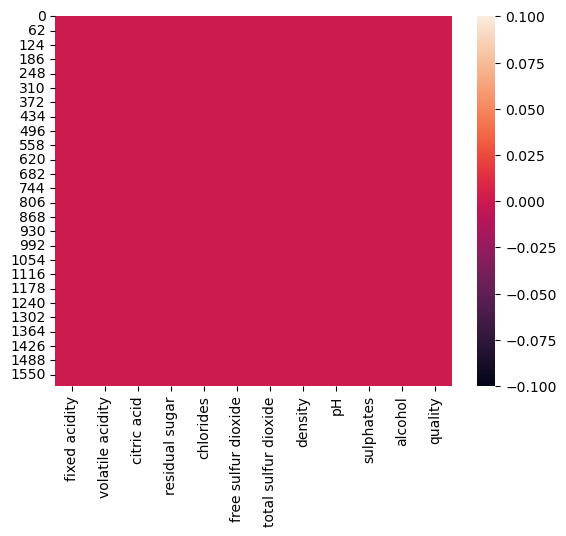

In [11]:
snn.heatmap(df.isnull())

Great none of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype.

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
for i in df.columns:
    print (df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [14]:
print("Print the number of duplicate values:", df.duplicated().sum())


Print the number of duplicate values: 240


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:
1. There is a big gap between 75% and max values of residual sugar column
2. There is a big gap between 75% and max values of free sulfur dioxide	column
3. There is a huge gap between 75% and max value of total sulfur dioxide column

All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

# Visualization

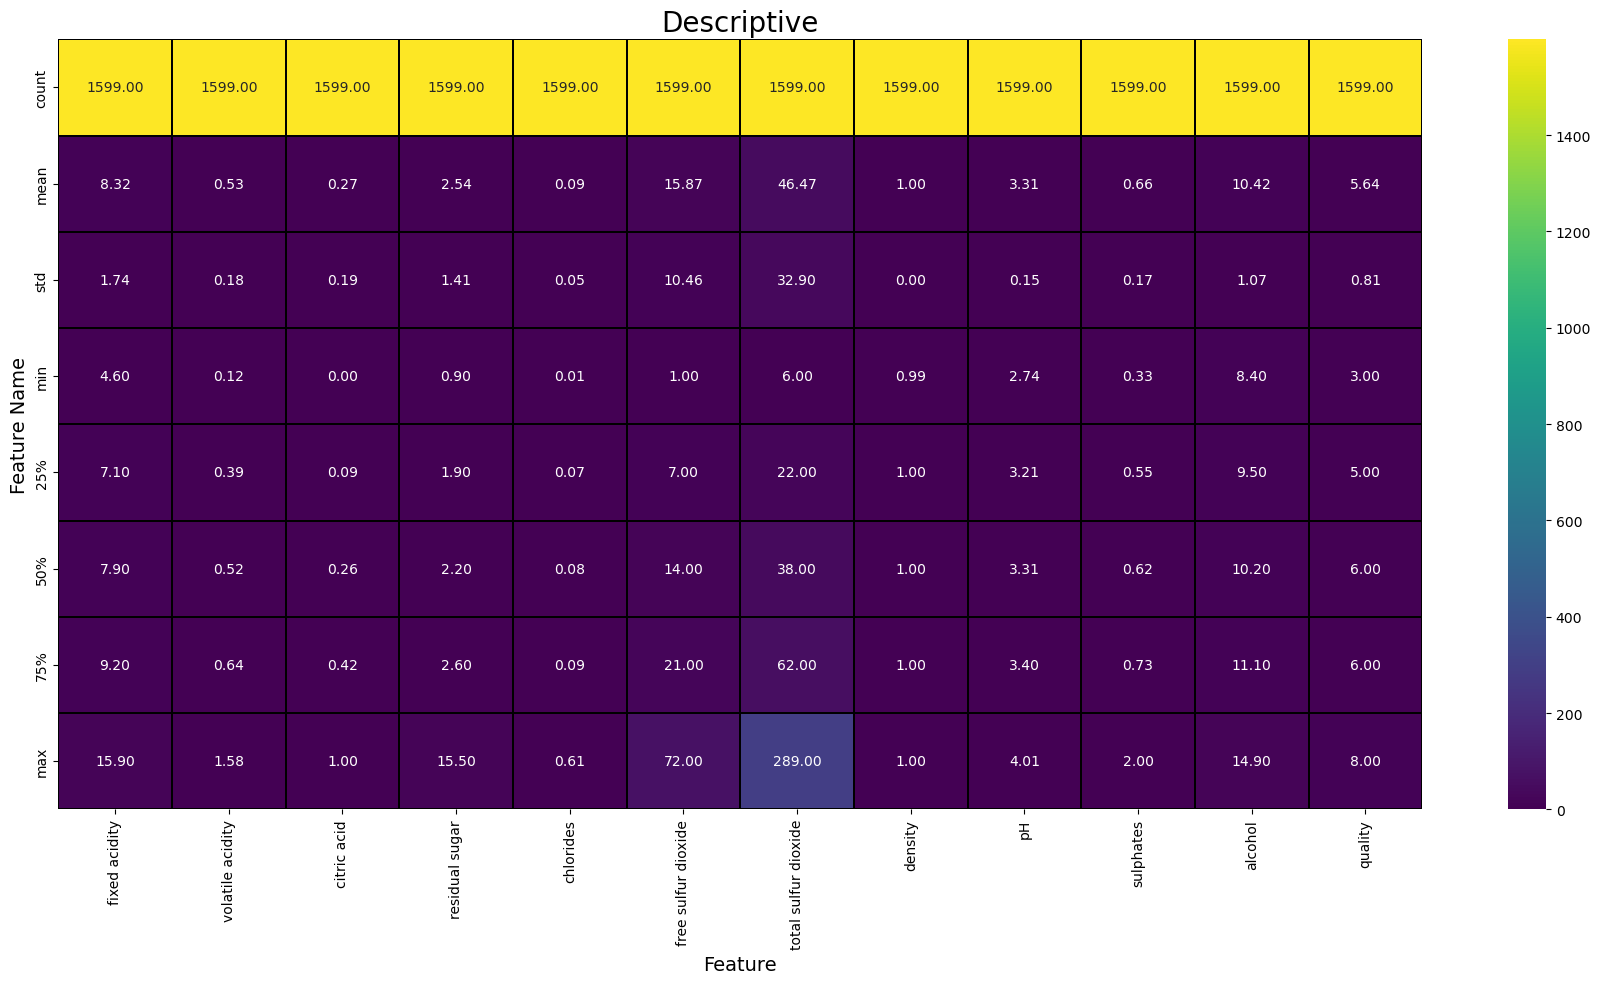

In [16]:
import seaborn as snn
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 10))
snn.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='viridis')
plt.xlabel("Feature", fontsize=14) 
plt.ylabel("Feature Name", fontsize=14)
plt.title("Descriptive", fontsize=20)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


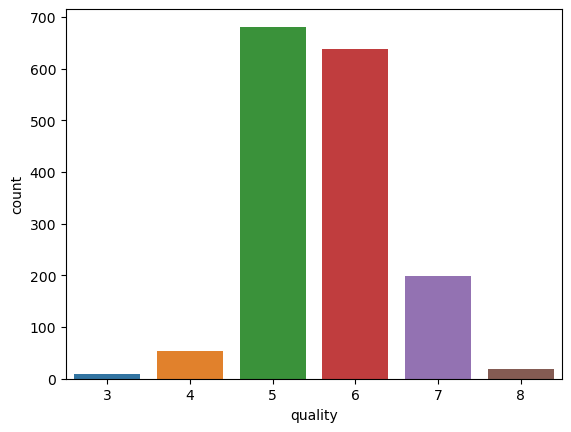

In [17]:
ax=snn.countplot(x="quality",data=df)
print(df["quality"].value_counts())
plt.show()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


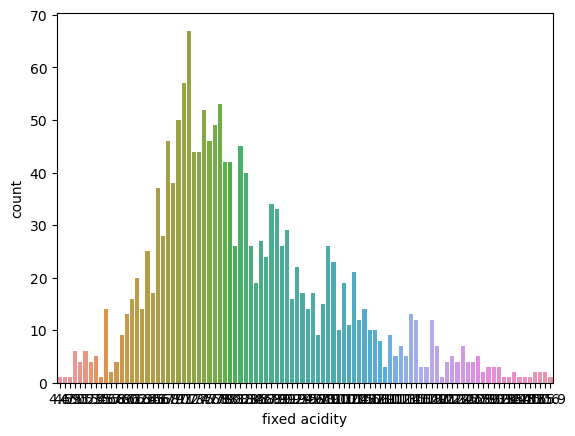

In [18]:
ax=snn.countplot(x="fixed acidity",data=df)
print(df["fixed acidity"].value_counts())
plt.show()

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


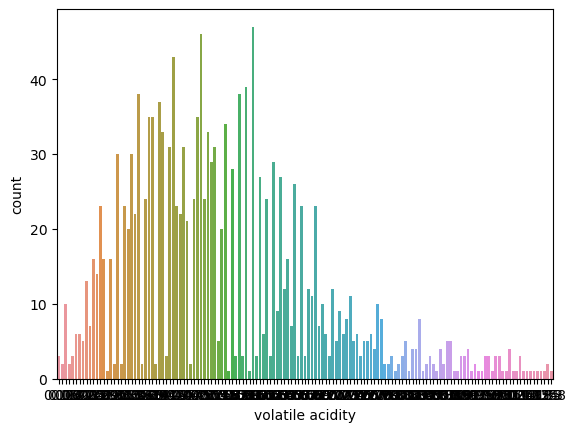

In [20]:
ax=snn.countplot(x="volatile acidity",data=df)
print(df["volatile acidity"].value_counts())
plt.show()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


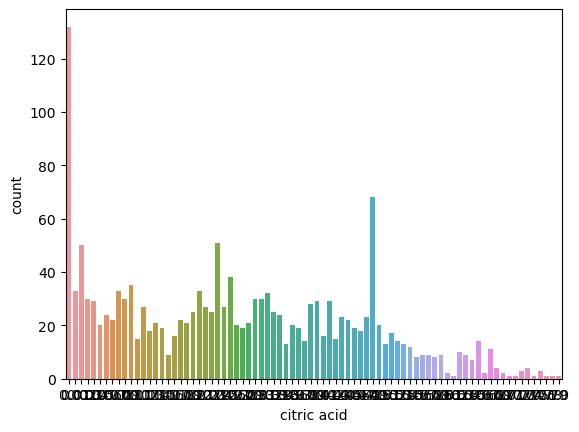

In [21]:
ax=snn.countplot(x="citric acid",data=df)
print(df["citric acid"].value_counts())
plt.show()

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


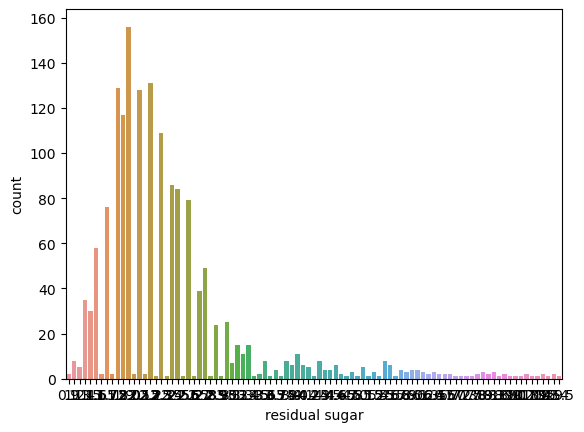

In [22]:
ax=snn.countplot(x="residual sugar",data=df)
print(df["residual sugar"].value_counts())
plt.show()

In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


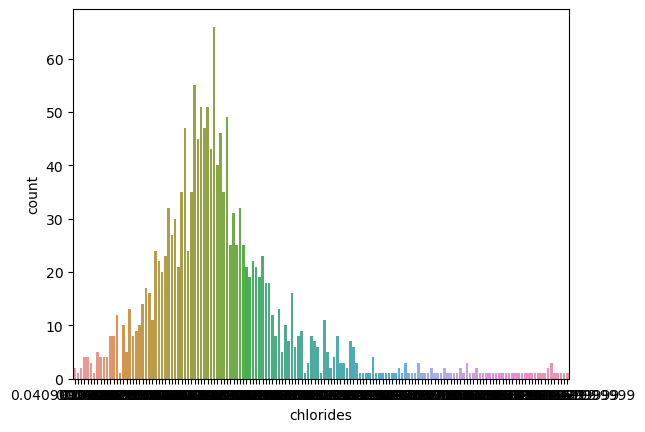

In [24]:
ax=snn.countplot(x="chlorides",data=df)
print(df["chlorides"].value_counts())
plt.show()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64


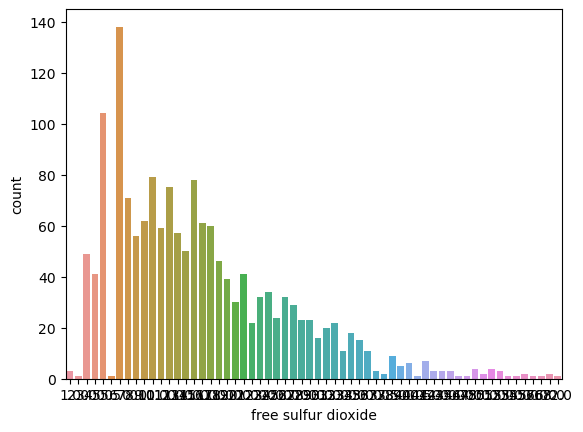

In [25]:
ax=snn.countplot(x="free sulfur dioxide",data=df)
print(df["free sulfur dioxide"].value_counts())
plt.show()

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64


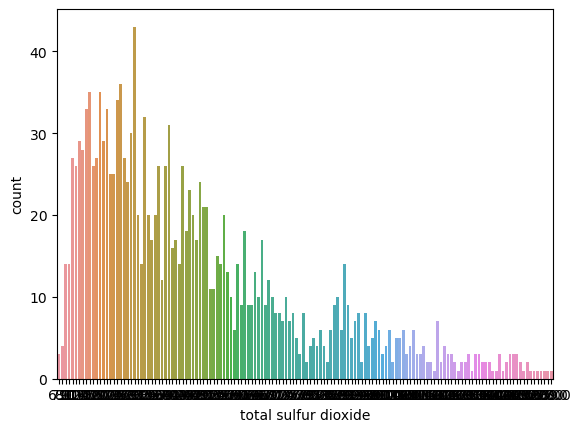

In [26]:
print(df["total sulfur dioxide"].value_counts())
ax=snn.countplot(x="total sulfur dioxide",data=df)

plt.show()

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64


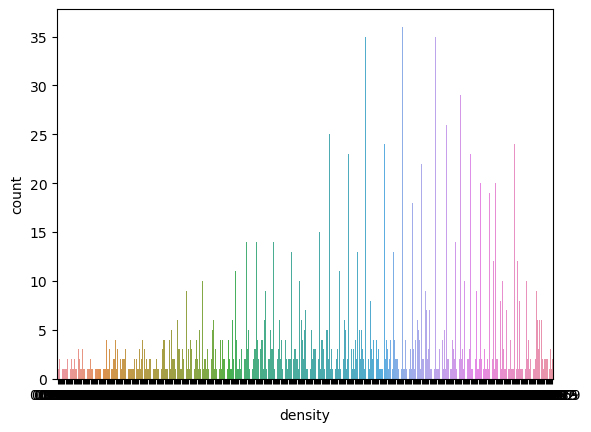

In [28]:
print(df["density"].value_counts())
ax=snn.countplot(x="density",data=df)

plt.show()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


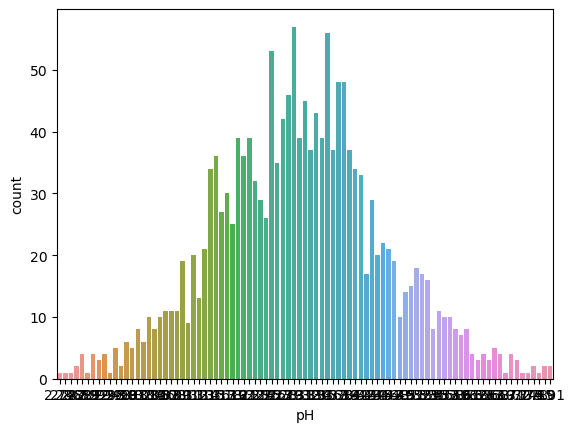

In [29]:
print(df["pH"].value_counts())
ax=snn.countplot(x="pH",data=df)

plt.show()

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


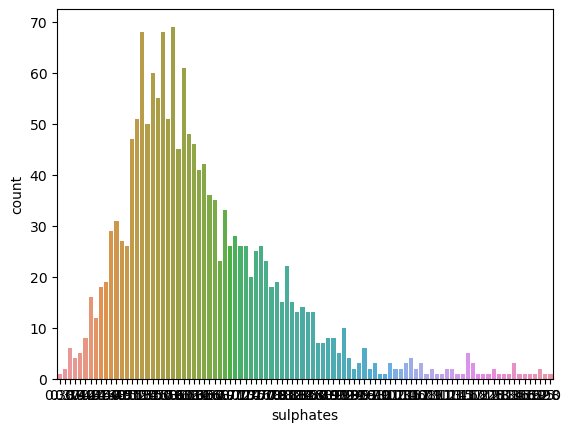

In [30]:
print(df["sulphates"].value_counts())
ax=snn.countplot(x="sulphates",data=df)

plt.show()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


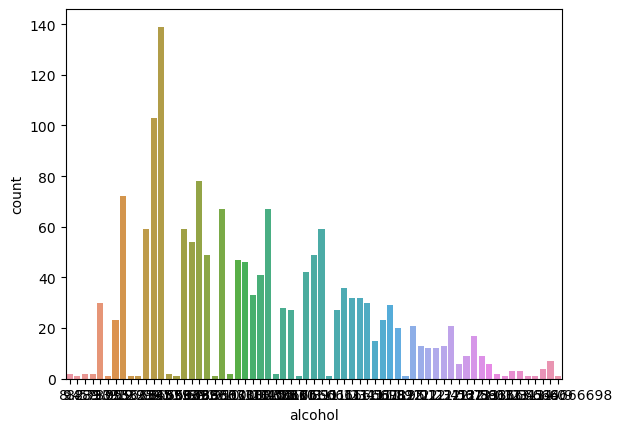

In [31]:
print(df["alcohol"].value_counts())
ax=snn.countplot(x="alcohol",data=df)

plt.show()

With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are: 01. fixed acidity vs quality - no fixed pattern 02. volatile acidity vs quality - there is a decreasing trend 03. citric acid vs quality - there is an increasing trend 04. residual sugar vs quality - no fixed pattern 05. chlorides vs quality - there is a decreasing trend 06. free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 07. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 08. density vs quality - no pattern at all 09. pH vs quality - no pattern at all 10. sulphates vs quality - there is an increasing trend 11. alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

# data distribution

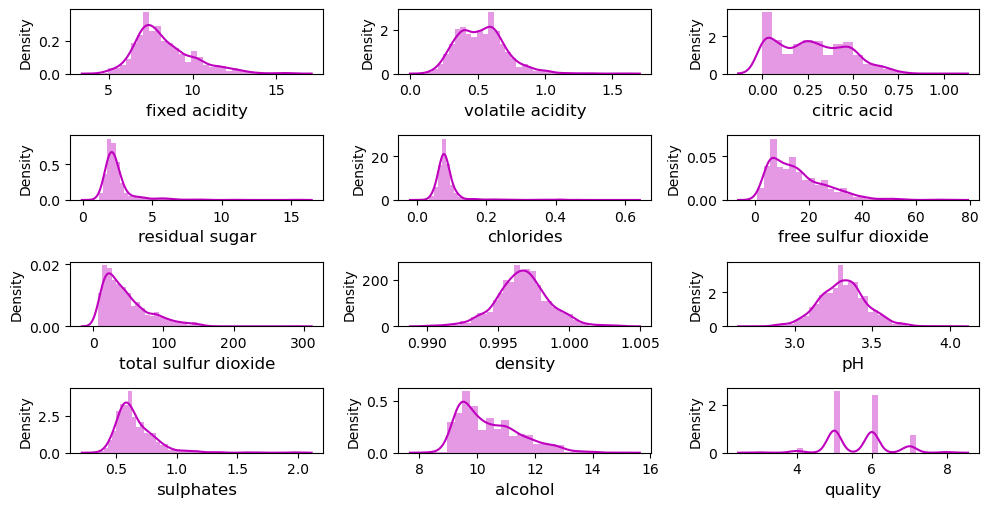

In [32]:
plt.figure(figsize=(10,6),facecolor= "white")
plotnumper = 1
for i in df:
    if plotnumper<=12:
        plt.subplot(5,3,plotnumper)
        snn.distplot(df[i],color = 'm')
        plt.xlabel(i,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumper+=1
plt.tight_layout()    

# checking outiliers

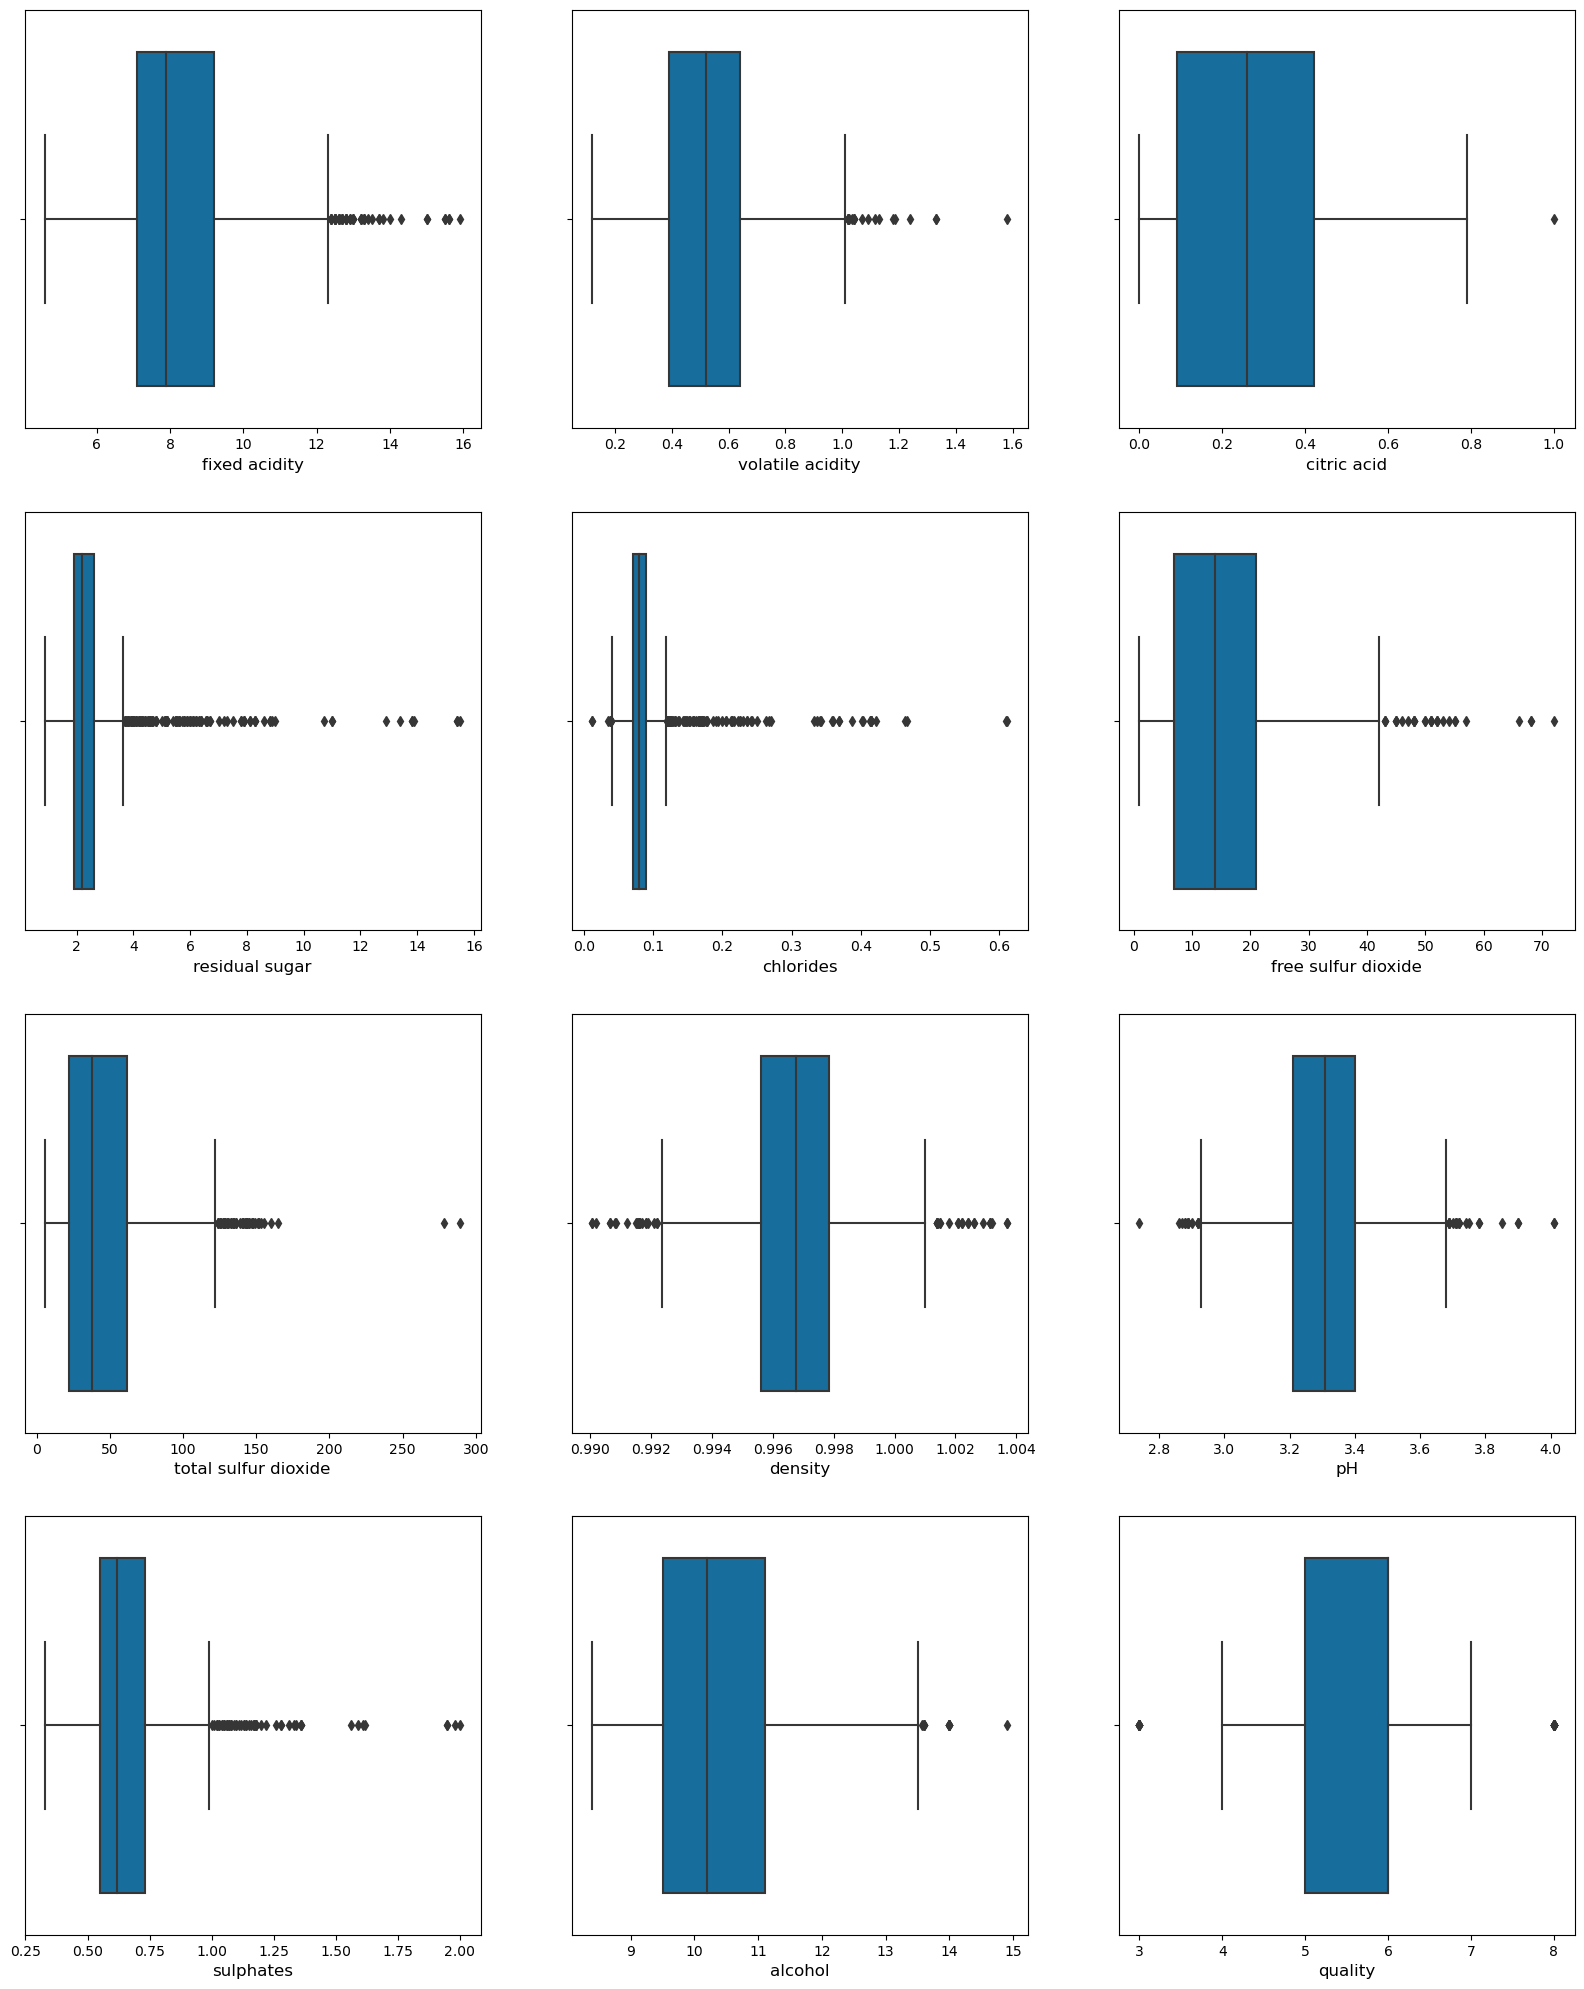

In [49]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        ax=plt.subplot(4,3,p)
        snn.boxplot(df[i],palette="colorblind")
        plt.xlabel(i,fontsize=12)
    p+=1
plt.show()    

With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

# detecting outliers

In [50]:
from scipy.stats import zscore
out_features=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
z=np.abs(zscore(out_features))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [52]:
np.where(z>3)


(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [53]:
df1=df[(z<3).all(axis=1)]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
df.shape

(1599, 12)

In [55]:
df1.shape

(1458, 12)

In [56]:
""""
x- has independent variables
y- target variable
z=np.abs(zscore(x))
x1=x[(z<3).all(axis=1)]

y1=y[(z<3).all(axis=1)]

df=df[(z<3).all(axis=1)]
"""

'"\nx- has independent variables\ny- target variable\nz=np.abs(zscore(x))\nx1=x[(z<3).all(axis=1)]\n\ny1=y[(z<3).all(axis=1)]\n\ndf=df[(z<3).all(axis=1)]\n'

In [57]:
print("old data frame-",df.shape[0])
print("New data frame-",df1.shape[0])


old data frame- 1599
New data frame- 1458


In [58]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 8.818011257035648


In [ ]:
df=df1

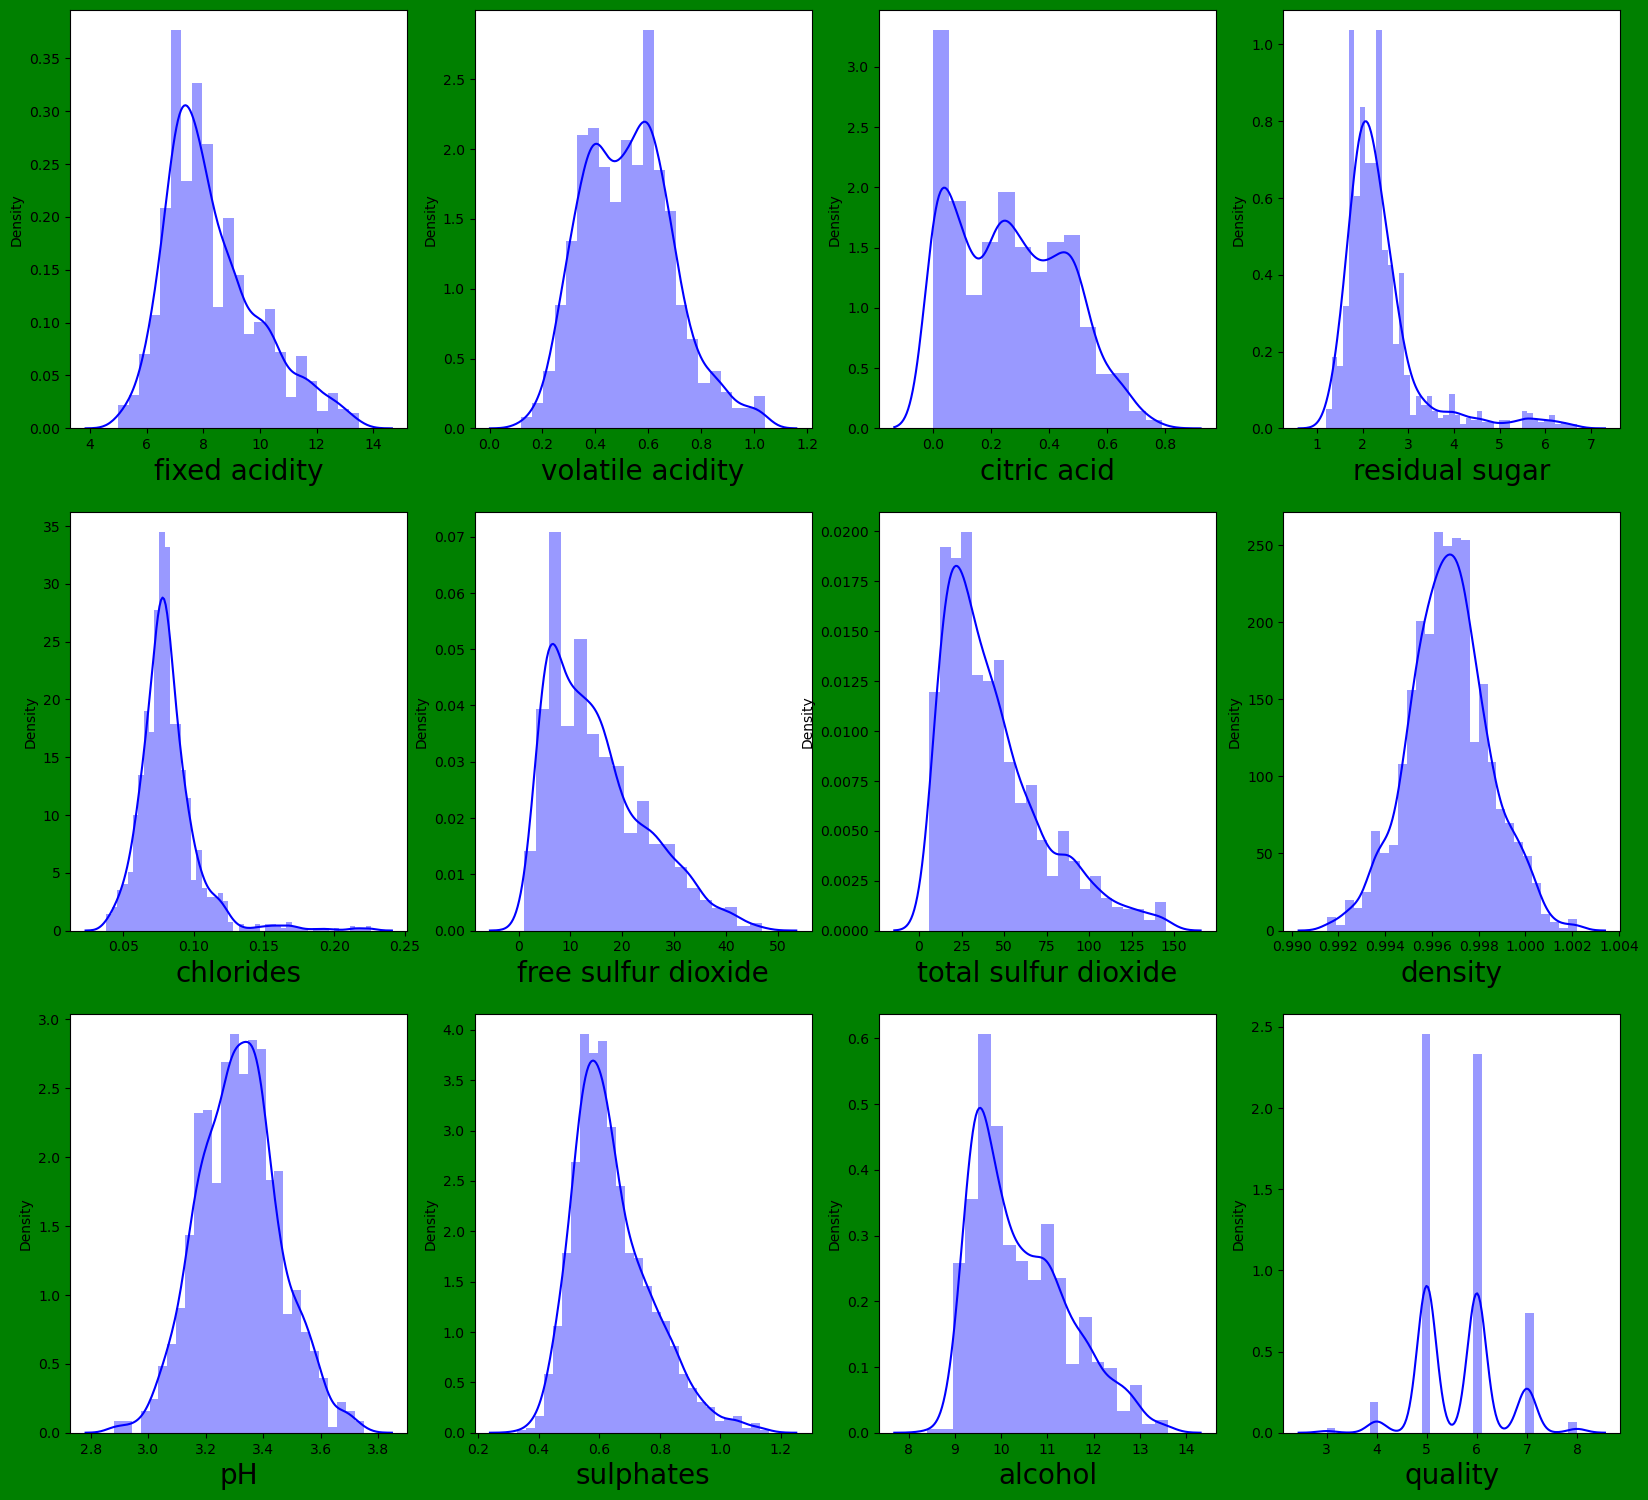

In [60]:
plt.figure(figsize=(20,25),facecolor="green")
p=1
for i in df:
    if p<=17:
        ax=plt.subplot(4,4,p)
        snn.distplot(df[i],color="b")
        plt.xlabel(i,fontsize=20)
    p+=1
plt.show()    

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

# skewness

In [61]:
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

Here we see the skewness information present in our dataset. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

In [62]:
df["fixed acidity"]=np.cbrt(df["fixed acidity"])

In [63]:
df["residual sugar"]=np.cbrt(df["residual sugar"])

In [64]:
df["chlorides"]=np.cbrt(df["chlorides"])

In [65]:
df["free sulfur dioxide"]=np.cbrt(df["free sulfur dioxide"])

In [66]:
df["total sulfur dioxide"]=np.cbrt(df["total sulfur dioxide"])

In [67]:
df["pH"]=np.cbrt(df["pH"])

In [68]:
df["sulphates"]=np.cbrt(df["sulphates"])

In [69]:
df["alcohol"]=np.cbrt(df["alcohol"])

In [70]:
df.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.026443
sulphates               0.526494
alcohol                 0.643830
quality                 0.248823
dtype: float64

# Correlation using a Heatmap


1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [71]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296687,0.696169,0.196737,0.218480,-0.165764,-0.098864,0.663596,-0.717782,0.195504,-0.031849,0.132214
volatile acidity,-0.296687,1.000000,-0.589286,0.035657,0.077700,0.032589,0.102031,-0.000446,0.251355,-0.355067,-0.212976,-0.362783
citric acid,0.696169,-0.589286,1.000000,0.186738,0.105771,-0.097483,-0.015382,0.372338,-0.522069,0.307518,0.163903,0.238244
residual sugar,0.196737,0.035657,0.186738,1.000000,0.165153,0.003969,0.095767,0.372759,-0.075803,0.068781,0.163337,0.051887
chlorides,0.218480,0.077700,0.105771,0.165153,1.000000,-0.041496,0.065122,0.375113,-0.196936,0.009585,-0.244662,-0.139388
free sulfur dioxide,-0.165764,0.032589,-0.097483,0.003969,-0.041496,1.000000,0.751304,-0.041366,0.127657,0.050594,-0.087483,-0.064810
total sulfur dioxide,-0.098864,0.102031,-0.015382,0.095767,0.065122,0.751304,1.000000,0.132889,0.020667,-0.011570,-0.267689,-0.205050
density,0.663596,-0.000446,0.372338,0.372759,0.375113,-0.041366,0.132889,1.000000,-0.312443,0.131361,-0.466713,-0.177758
pH,-0.717782,0.251355,-0.522069,-0.075803,-0.196936,0.127657,0.020667,-0.312443,1.000000,-0.031582,0.136771,-0.084684
sulphates,0.195504,-0.355067,0.307518,0.068781,0.009585,0.050594,-0.011570,0.131361,-0.031582,1.000000,0.250213,0.390975


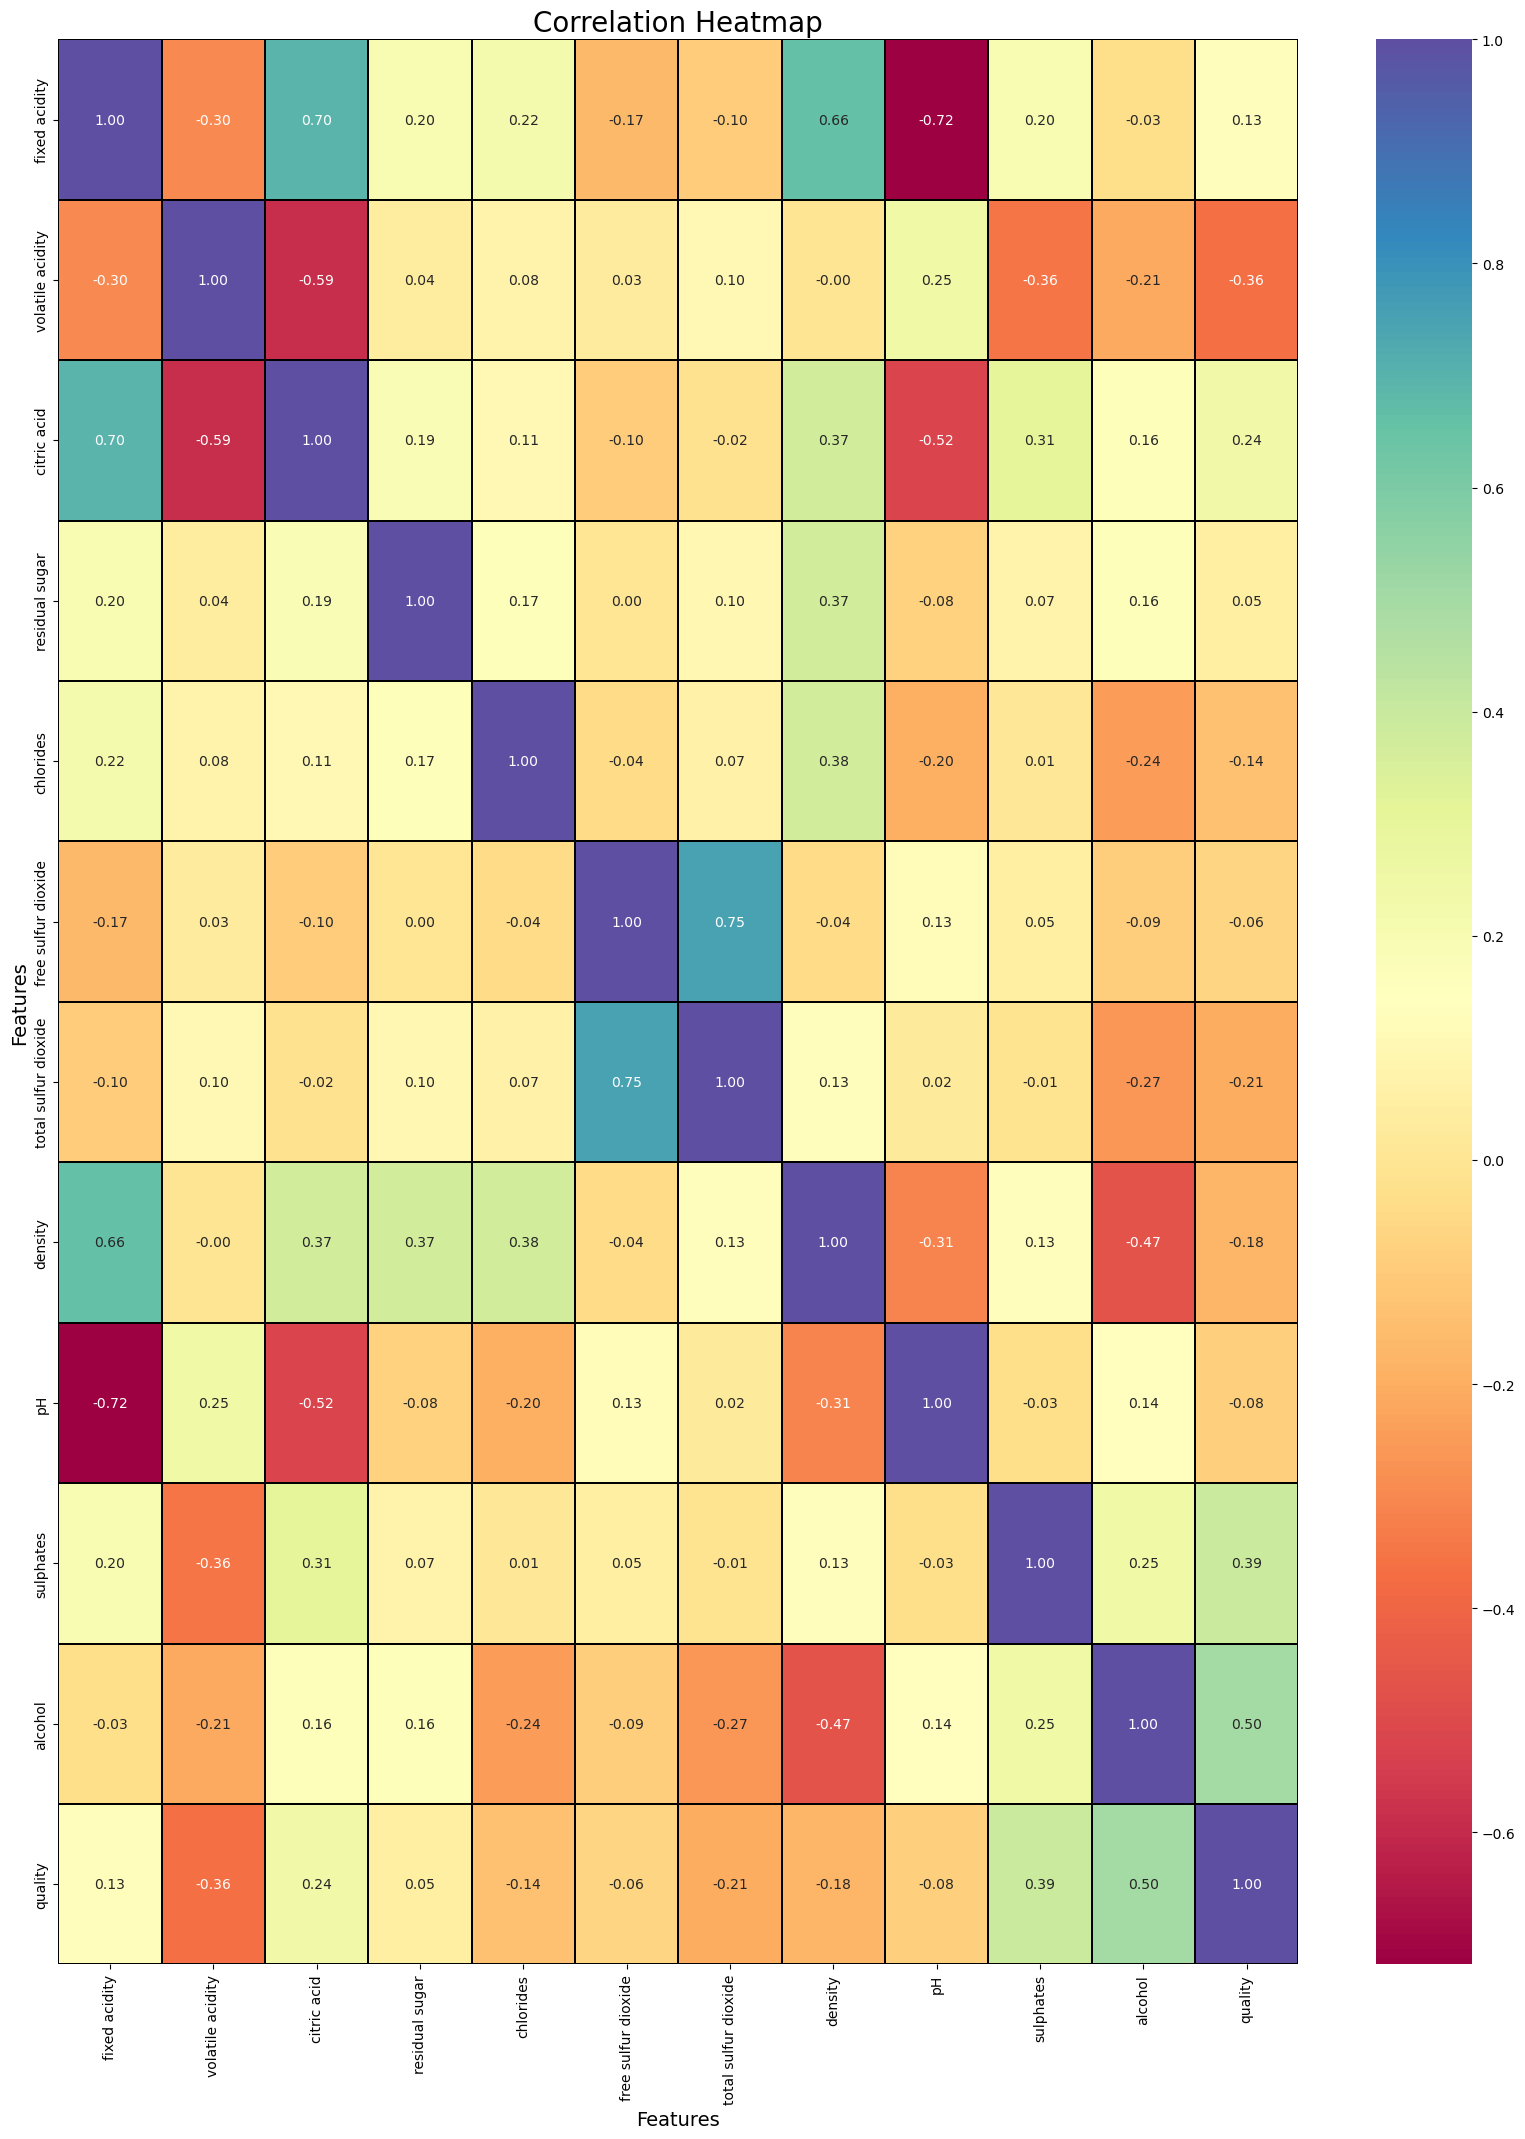

In [72]:

plt.figure(figsize=(20, 25))
snn.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

In [73]:
df.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.497463
sulphates               0.390975
citric acid             0.238244
fixed acidity           0.132214
residual sugar          0.051887
free sulfur dioxide    -0.064810
pH                     -0.084684
chlorides              -0.139388
density                -0.177758
total sulfur dioxide   -0.205050
volatile acidity       -0.362783
Name: quality, dtype: float64

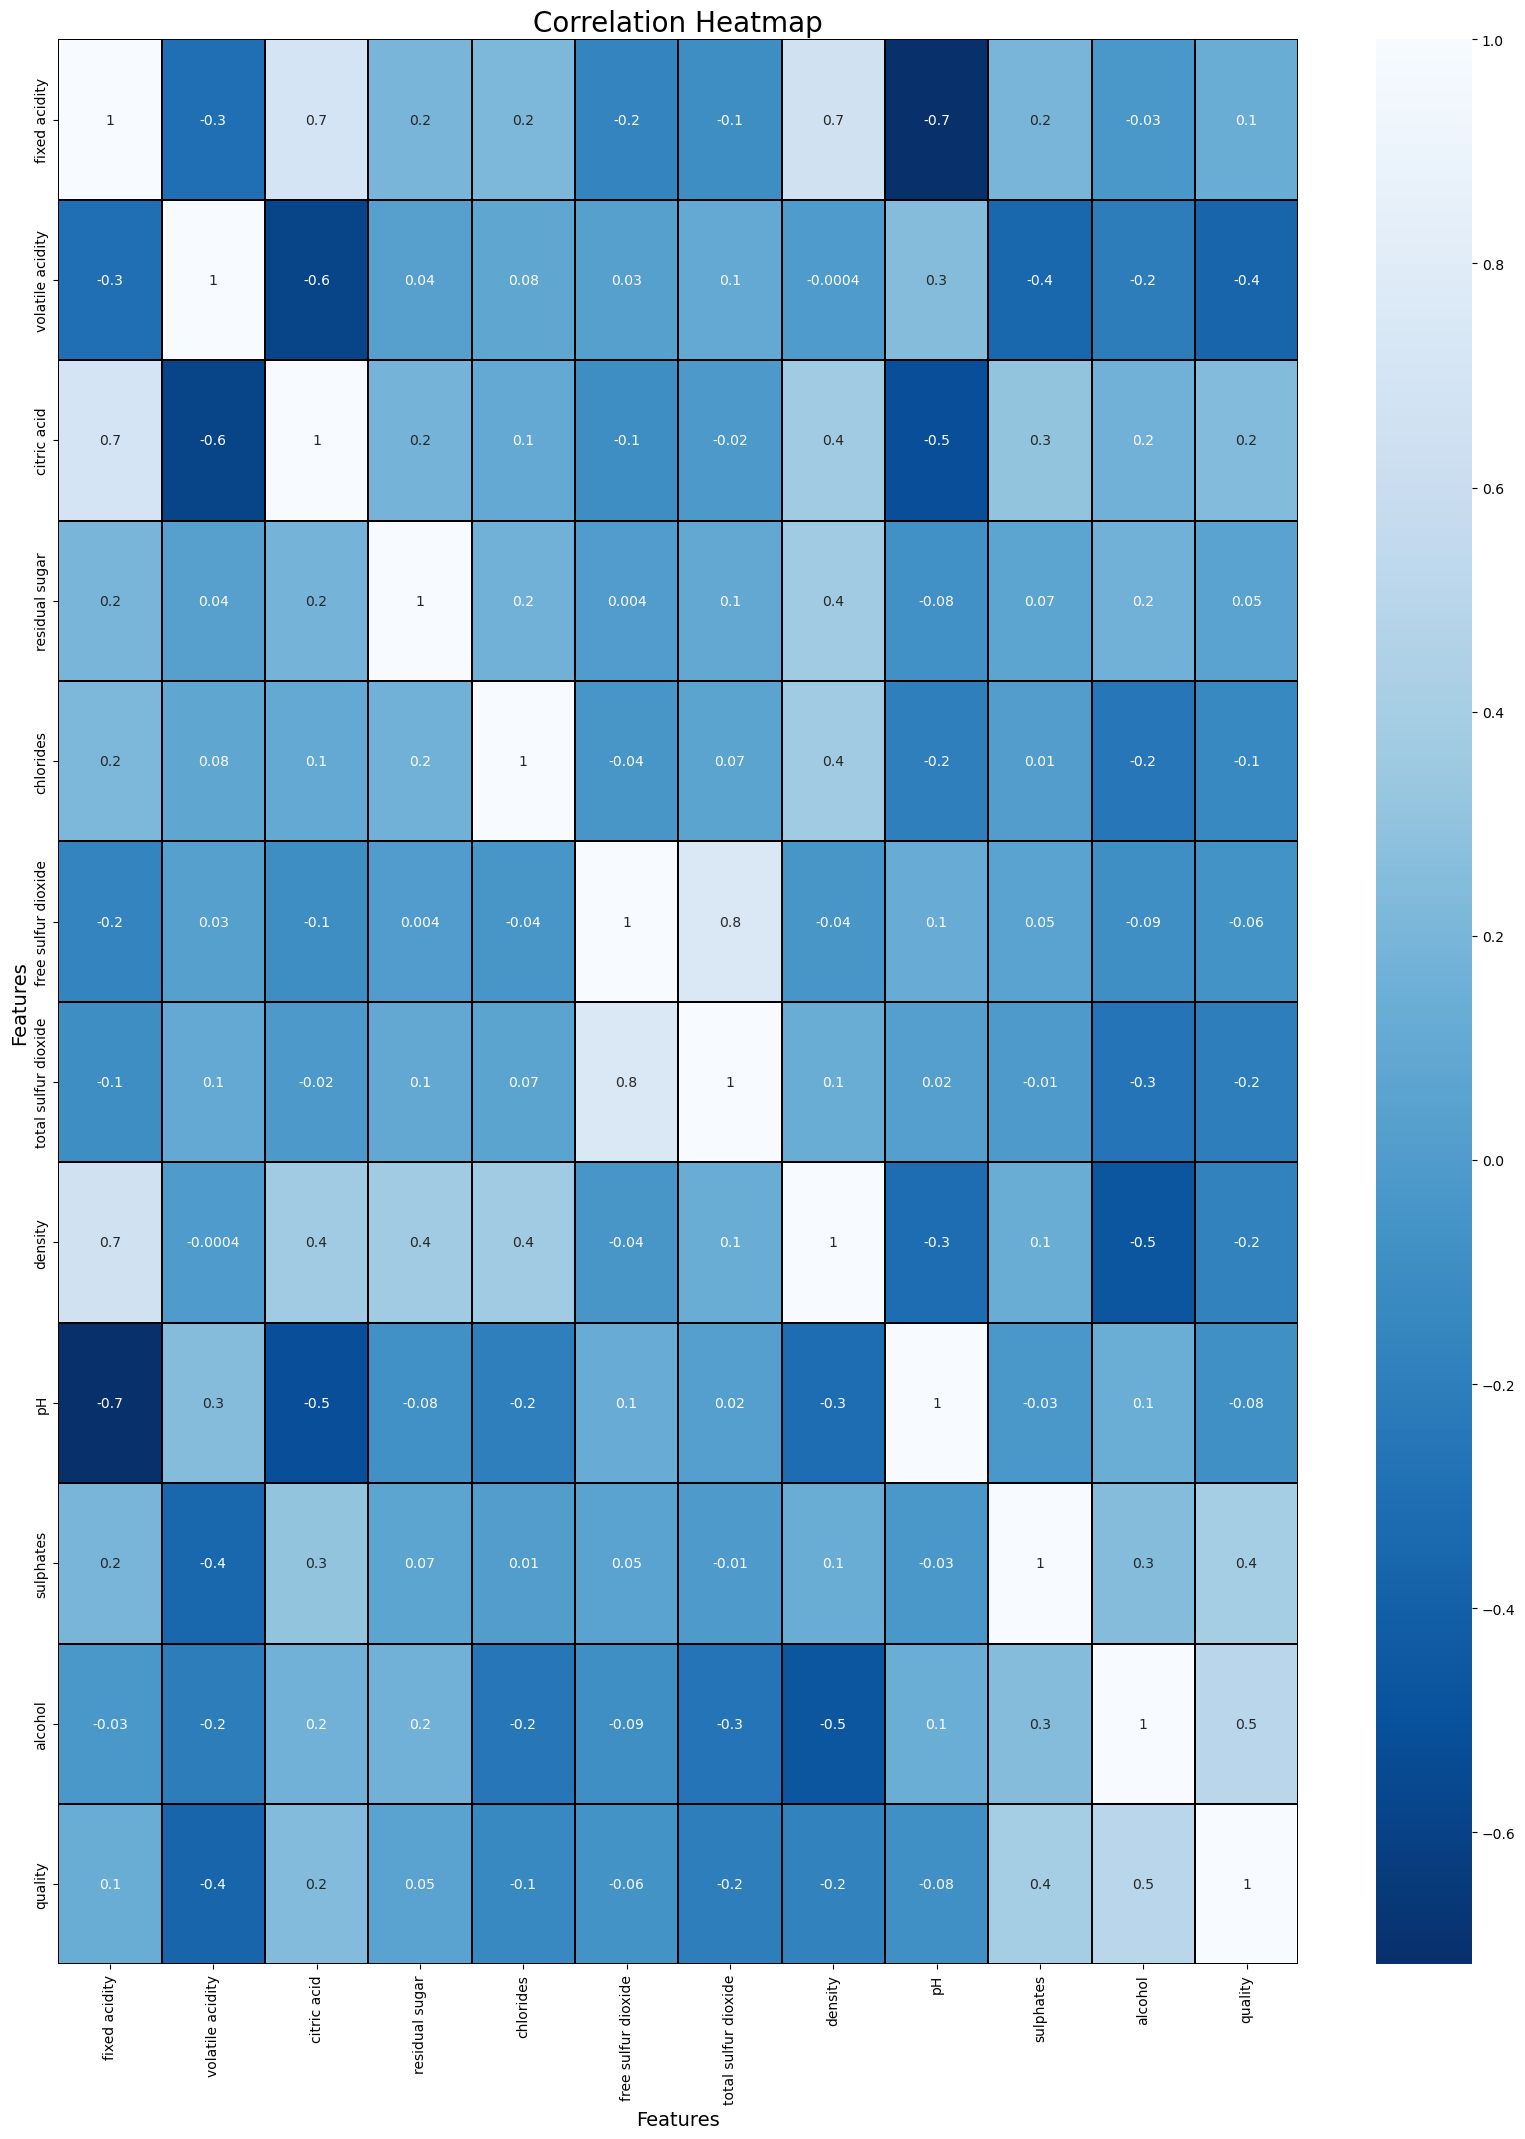

In [74]:
plt.figure(figsize=(20, 25))
snn.heatmap(df.corr(), annot=True, fmt='.1g', linewidth=0.2, linecolor='black', cmap='Blues_r')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

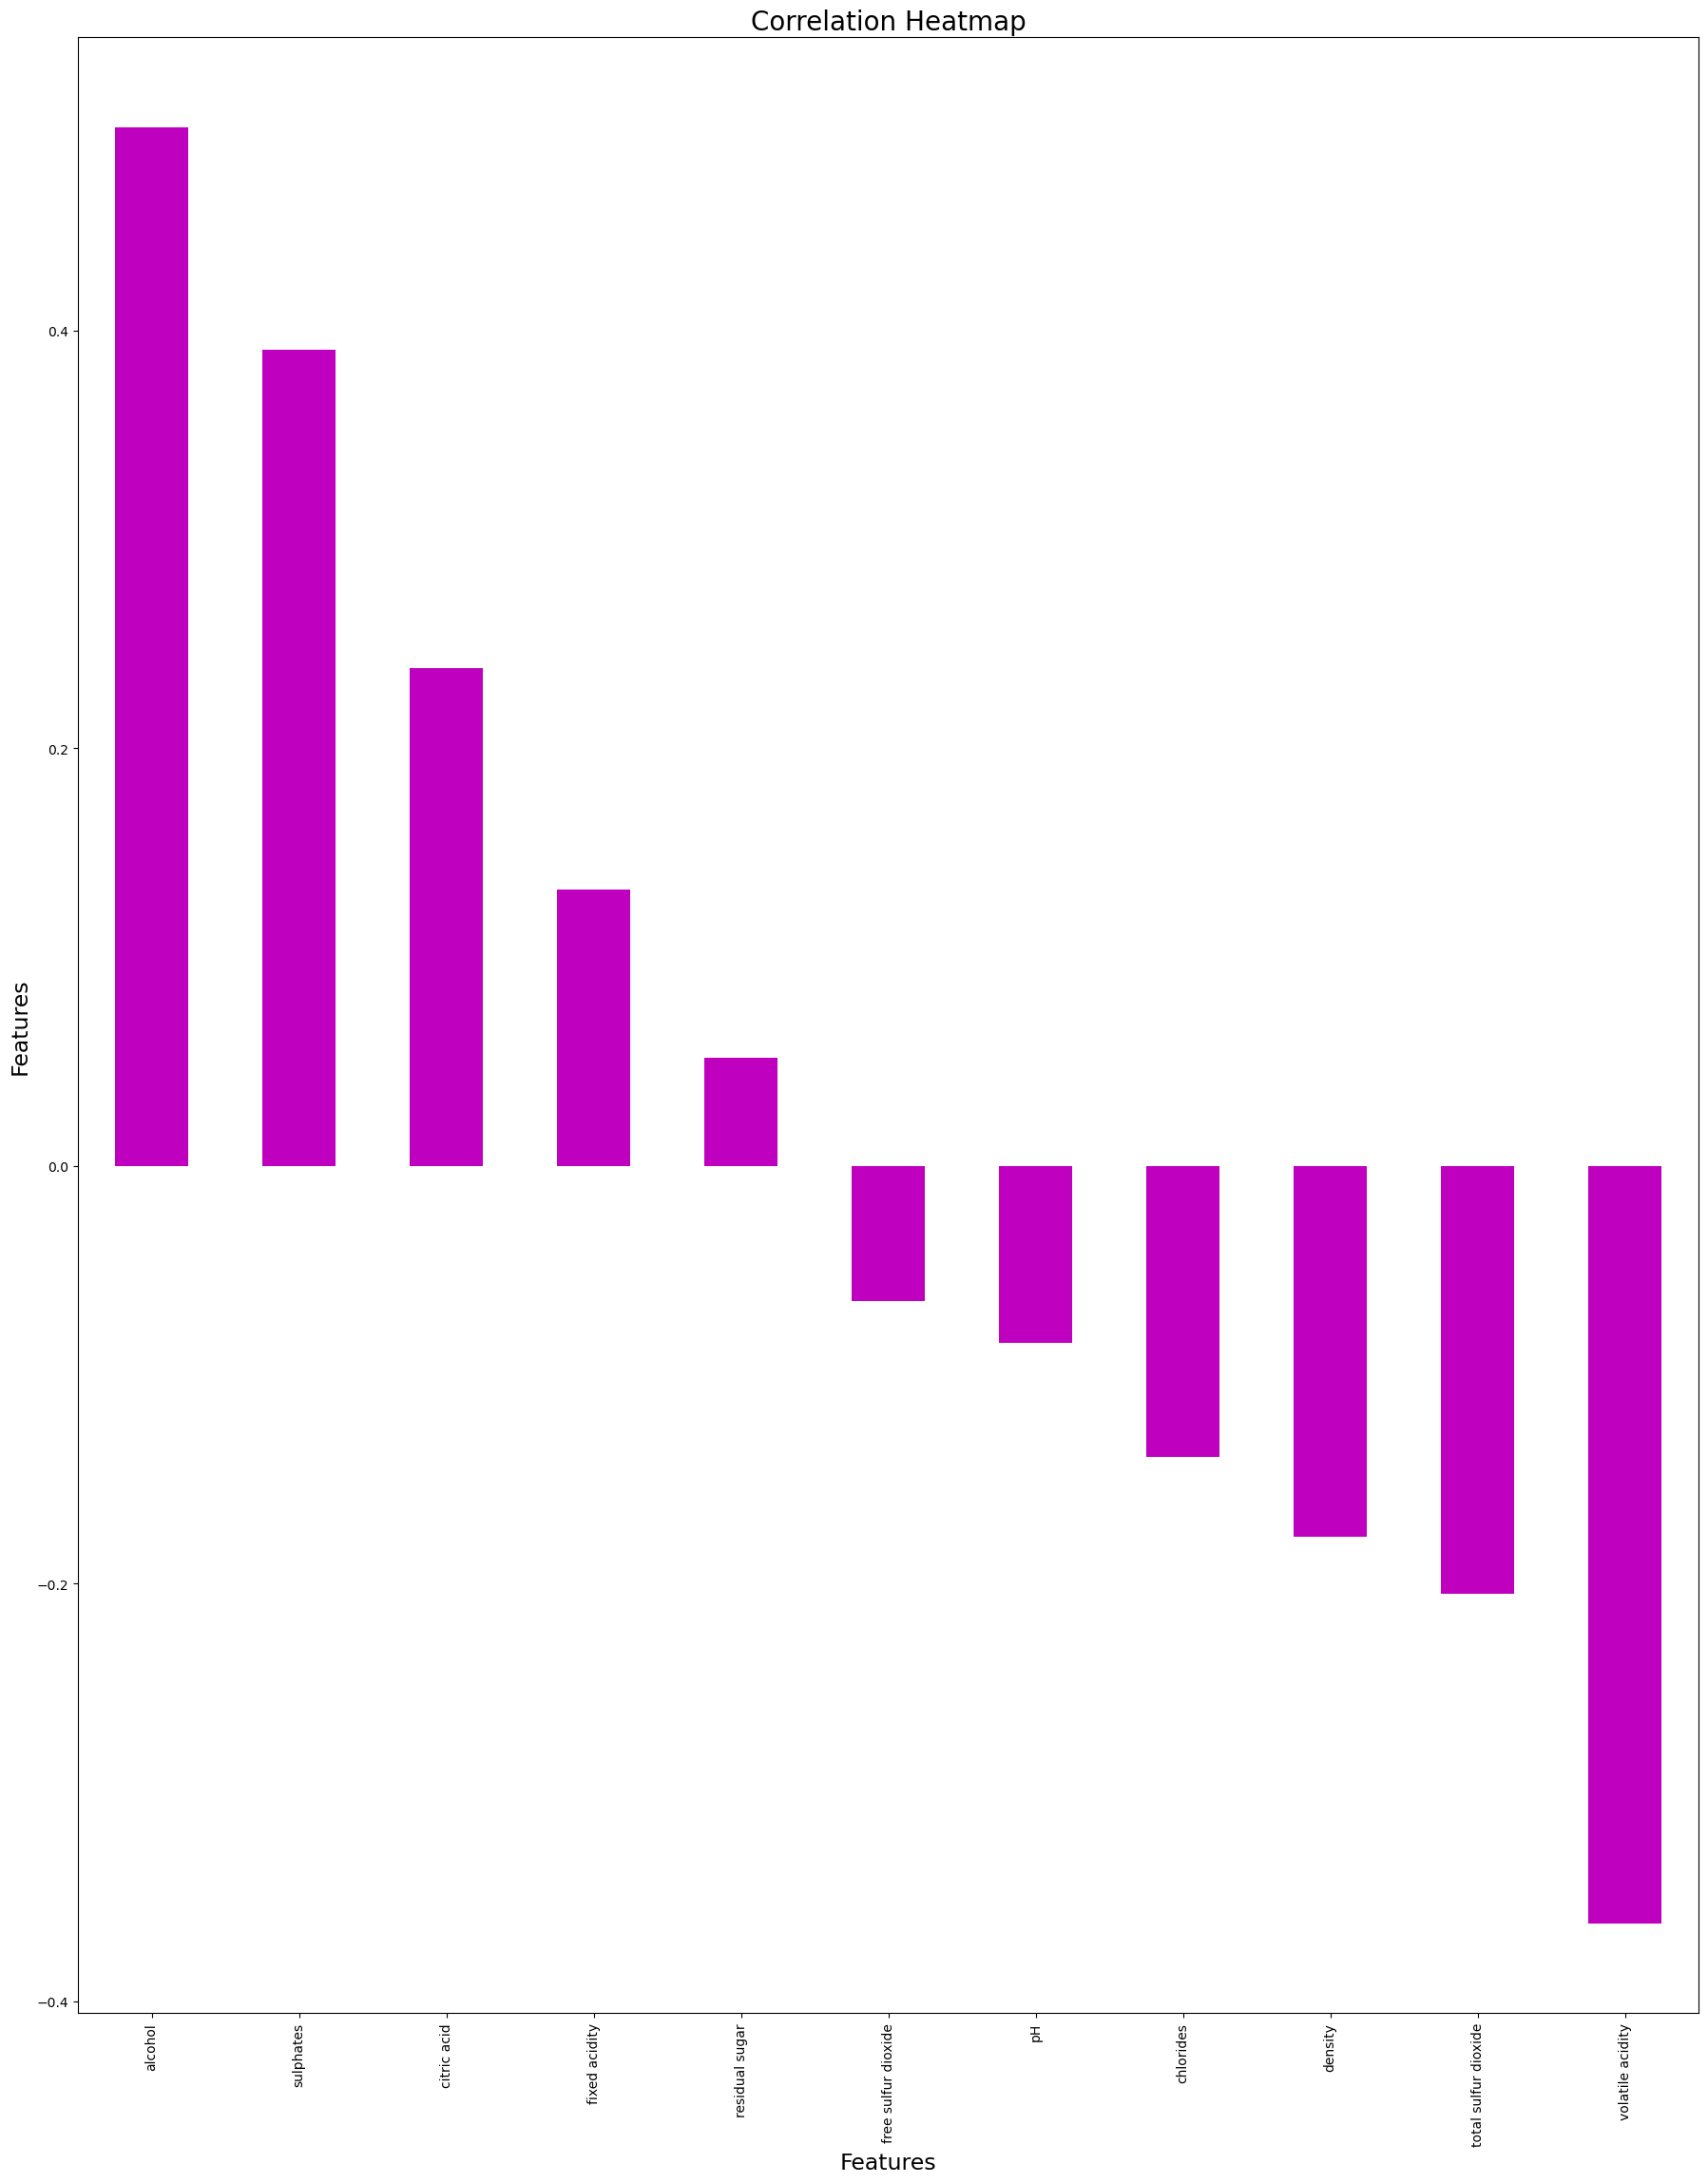

In [75]:
plt.figure(figsize=(22, 27))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color="m")
plt.xlabel('Features', fontsize=17)
plt.ylabel('Features', fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [76]:
x=df.drop("quality",axis=1)
y=df["quality"]


I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

In [77]:
print("features dimension",x.shape)
print("label dimension",y.shape)

features dimension (1458, 11)
label dimension (1458,)


# Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.529589,1.038708,-1.387413,-0.610269,-0.212751,-0.276875,-0.151874,0.629873,1.363501,-0.621424,-1.019282
1,-0.263403,2.101325,-1.387413,0.388180,0.883719,1.096574,0.934243,0.047678,-0.819709,0.359794,-0.597376
2,-0.263403,1.392914,-1.178214,-0.014565,0.602501,0.198376,0.561889,0.164117,-0.386484,0.126070,-0.597376
3,1.697926,-1.440732,1.541370,-0.610269,-0.267369,0.404518,0.740417,0.746312,-1.111542,-0.448750,-0.597376
4,-0.529589,1.038708,-1.387413,-0.610269,-0.212751,-0.276875,-0.151874,0.629873,1.363501,-0.621424,-1.019282
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.390745,0.448365,-0.969015,-0.454045,0.506051,1.588604,0.232309,-1.058494,0.951282,-0.448750,0.114140
1454,-1.623168,0.153194,-0.864416,-0.156569,-1.026243,2.013192,0.467628,-0.930411,1.431747,0.951183,0.794696
1455,-1.314940,-0.082944,-0.707517,-0.014565,-0.212751,1.387532,0.086430,-0.569449,0.743379,0.879603,0.603216
1456,-1.623168,0.714019,-0.759816,-0.454045,-0.267369,1.588604,0.232309,-0.726642,1.771049,0.586742,-0.186800


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,8.144758,fixed acidity
1,1.856093,volatile acidity
2,3.133398,citric acid
3,1.752590,residual sugar
4,1.212368,chlorides
5,2.578044,free sulfur dioxide
6,2.866395,total sulfur dioxide
7,6.742874,density
8,3.357463,pH
9,1.342050,sulphates


In [82]:
x.drop("fixed acidity",axis=1, inplace=True)

In [83]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.854977,volatile acidity
1,2.829801,citric acid
2,1.513157,residual sugar
3,1.200193,chlorides
4,2.546008,free sulfur dioxide
5,2.749454,total sulfur dioxide
6,2.725871,density
7,1.529685,pH
8,1.327020,sulphates
9,2.396120,alcohol


# Taking care of class imbalance

In [84]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

In [86]:
pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x1,y1=SM.fit_resample(x,y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value

In [87]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [88]:
y1.value_counts()

5    617
6    617
7    617
4    617
8    617
3    617
Name: quality, dtype: int64

# Machine Learning Model for Classification and Evaluation Metrics¶

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression




In [90]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred) 
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is:", maxAccu, "at random_state", maxRs)


Best accuracy is: 0.8937893789378938 at random_state 177


In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)


I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [94]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC)) 



0.682648401826484
[[  0   0   1   0   0   0]
 [  1   0   6   4   0   0]
 [  0   1 143  37   0   0]
 [  0   2  47 119  10   0]
 [  0   0   5  20  37   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.71      0.79      0.75       181
           6       0.65      0.67      0.66       178
           7       0.76      0.60      0.67        62
           8       0.00      0.00      0.00         5

    accuracy                           0.68       438
   macro avg       0.35      0.34      0.35       438
weighted avg       0.66      0.68      0.67       438



In [97]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))


0.6666666666666666
[[  0   0   1   0   0   0]
 [  1   0   9   1   0   0]
 [  1   5 137  37   1   0]
 [  1   0  48 117  11   1]
 [  0   0   4  20  38   0]
 [  0   0   0   1   4   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.69      0.76      0.72       181
           6       0.66      0.66      0.66       178
           7       0.70      0.61      0.66        62
           8       0.00      0.00      0.00         5

    accuracy                           0.67       438
   macro avg       0.34      0.34      0.34       438
weighted avg       0.65      0.67      0.66       438



In [104]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR)) 



0.6187214611872146
[[  0   0   1   0   0   0]
 [  0   0   9   2   0   0]
 [  0   0 136  45   0   0]
 [  2   0  57 109  10   0]
 [  0   0   2  34  26   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.66      0.75      0.70       181
           6       0.56      0.61      0.59       178
           7       0.68      0.42      0.52        62
           8       0.00      0.00      0.00         5

    accuracy                           0.62       438
   macro avg       0.32      0.30      0.30       438
weighted avg       0.60      0.62      0.60       438



In [100]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC)) 
print(confusion_matrix(y_test, predETC)) 
print(classification_report(y_test, predETC)) 


0.7031963470319634
[[  0   0   1   0   0   0]
 [  1   0   8   2   0   0]
 [  0   1 148  32   0   0]
 [  0   0  45 124   9   0]
 [  0   0   5  21  36   0]
 [  0   0   0   2   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.71      0.82      0.76       181
           6       0.69      0.70      0.69       178
           7       0.75      0.58      0.65        62
           8       0.00      0.00      0.00         5

    accuracy                           0.70       438
   macro avg       0.36      0.35      0.35       438
weighted avg       0.68      0.70      0.69       438



In [105]:
BFC = BaggingClassifier()
BFC.fit(x_train, y_train)
predBFC = BFC.predict(x_test)
print(accuracy_score(y_test, predBFC)) 
print(confusion_matrix(y_test, predBFC)) 
print(classification_report(y_test, predBFC)) 


0.639269406392694
[[  0   0   1   0   0   0]
 [  1   0   7   2   1   0]
 [  0   2 142  36   1   0]
 [  0   1  63  99  15   0]
 [  0   0   7  16  39   0]
 [  0   0   1   2   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.64      0.78      0.71       181
           6       0.64      0.56      0.59       178
           7       0.67      0.63      0.65        62
           8       0.00      0.00      0.00         5

    accuracy                           0.64       438
   macro avg       0.33      0.33      0.33       438
weighted avg       0.62      0.64      0.63       438



In [106]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))


0.6301369863013698
[[  0   0   1   0   0   0]
 [  0   0   9   2   0   0]
 [  0   0 135  45   1   0]
 [  0   0  57 115   6   0]
 [  0   0   3  33  26   0]
 [  0   0   0   2   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.66      0.75      0.70       181
           6       0.58      0.65      0.61       178
           7       0.72      0.42      0.53        62
           8       0.00      0.00      0.00         5

    accuracy                           0.63       438
   macro avg       0.33      0.30      0.31       438
weighted avg       0.61      0.63      0.61       438



In [107]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))


0.5251141552511416
[[  0   0   1   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 143  38   0   0]
 [  0   0  91  87   0   0]
 [  0   0  10  50   0   2]
 [  0   0   0   5   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.57      0.79      0.66       181
           6       0.48      0.49      0.48       178
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00         5

    accuracy                           0.53       438
   macro avg       0.17      0.21      0.19       438
weighted avg       0.43      0.53      0.47       438



# CROSS_VAL_SCORE

In [108]:
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predETC)-score.mean())

[0.52739726 0.57191781 0.64383562 0.58762887 0.6185567 ]
0.5898672503883632
Different B/W Accuray score and cross validation score is-: 0.11332909664360025


Created the ETC Classifier Model and checked for it's evaluation metrics.

In [109]:
score=cross_val_score(BFC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predBFC)-score.mean())

[0.52054795 0.57191781 0.55136986 0.56357388 0.56357388]
0.554196676552276
Different B/W Accuray score and cross validation score is-: 0.08507272984041803


Created the BFC Classifier Model and checked for it's evaluation metrics.

In [110]:
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predABC)-score.mean())

[0.47945205 0.4760274  0.61643836 0.56357388 0.58075601]
0.5432495410252789
Different B/W Accuray score and cross validation score is-: -0.018135385774137314


Created the ABC Classifier Model and checked for it's evaluation metrics.

In [111]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predsvc)-score.mean())

[0.5239726  0.53424658 0.64383562 0.58419244 0.58075601]
0.5734006496257591
Different B/W Accuray score and cross validation score is-: 0.05673633667561073


Created the SVC Classifier Model and checked for it's evaluation metrics.

In [112]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predLR)-score.mean())

[0.52054795 0.57191781 0.62328767 0.58419244 0.60824742]
0.581638657440098
Different B/W Accuray score and cross validation score is-: 0.03708280374711659


Created the LR Classifier Model and checked for it's evaluation metrics.

In [113]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predRFC)-score.mean())

[0.52054795 0.57876712 0.60958904 0.56357388 0.57388316]
0.5692722308525161
Different B/W Accuray score and cross validation score is-: 0.1133761709739679


Created the RFC Classifier Model and checked for it's evaluation metrics

In [114]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predGB)-score.mean())

[0.53424658 0.55479452 0.56849315 0.56357388 0.57044674]
0.5583109730264088
Different B/W Accuray score and cross validation score is-: 0.10835569364025788


Created the GB Classifier Model and checked for it's evaluation metrics.

In [119]:
from sklearn.model_selection import GridSearchCV

In [122]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [123]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [126]:
GSCV.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [127]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [130]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 63.013698630136986


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# Saving the model

In [132]:
import joblib
import pickle 
filename='redwine.pkl'
pickle.dump(Final_Model,open(filename,"wb"))

loaded_model=pickle.load(open('redwine.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)



63.013698630136986


# Conclusion Matrix

In [135]:
conclusion=pd.DataFrame([Final_Model.predict(x_test)[:],y_test[:]],index=["predicted","originals"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
predicted,5,6,7,7,6,5,5,5,6,6,...,6,5,6,6,5,5,6,6,6,7
originals,6,6,8,8,5,5,5,6,5,7,...,7,4,6,7,5,5,7,6,7,7
